# 04_05: Weather charts

In [2]:
import math
import collections
import dataclasses
import datetime
import getweather

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<img src="nytimes.png">

In [3]:
allyears = np.vstack([getweather.getyear('PASADENA', ['TMIN','TMAX'], year)
                      for year in range(1910, 2024)])

In [4]:
allyears['TMIN'].shape

(114, 365)

In [5]:
allyears['TMIN']

array([[ 2.2,  1.1, -0.6, ...,  1.7,  0.6,  1.1],
       [-0.6,  0.6,  1.1, ...,  0. , -1.7, -1.7],
       [ 3.3,  2.2,  0. , ..., -0.6,  0.6,  2.2],
       ...,
       [ 7.2,  7.2,  8.3, ...,  5.6,  8.9,  6.7],
       [ 6.7,  4.4,  4.4, ..., 11.7, 12.8, 12.8],
       [ 8.9,  6.7,  8.3, ..., 11.1, 11.1,  8.9]])

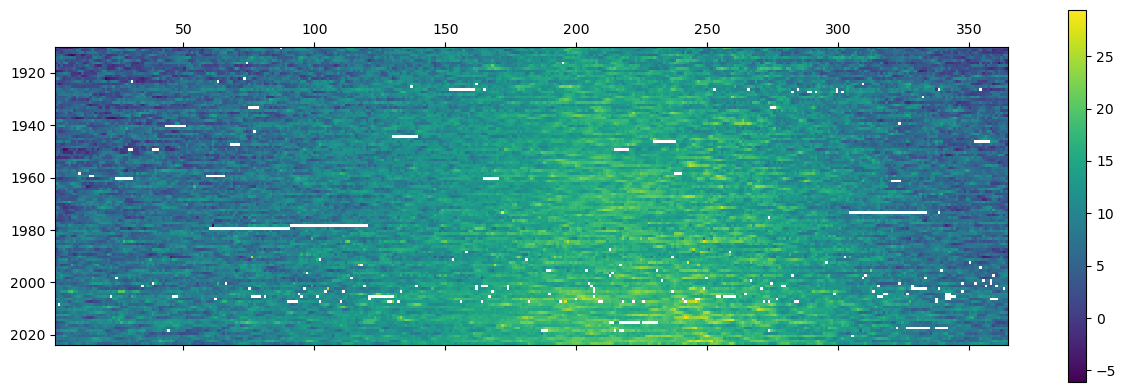

In [6]:
plt.matshow(allyears['TMIN'], extent=[1, 365, 2024, 1910])
plt.colorbar()

In [7]:
tmin_record = np.nanmin(allyears['TMIN'], axis=0)
tmax_record = np.nanmax(allyears['TMAX'], axis=0)

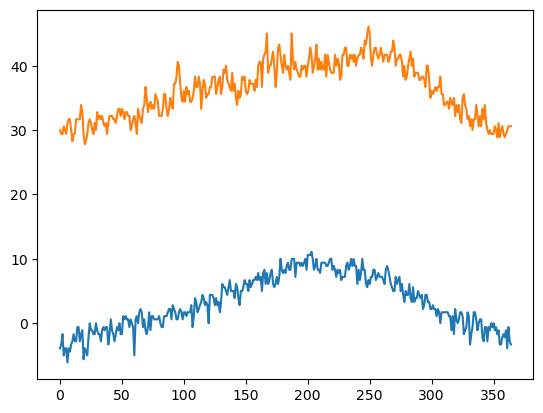

In [8]:
plt.plot(tmin_record)
plt.plot(tmax_record)

In [9]:
normal = np.vstack([getweather.getyear('PASADENA', ['TMIN','TMAX'], year)
                    for year in range(1981, 2011)])

In [10]:
tmin_normal = np.nanmean(normal['TMIN'], axis=0)
tmax_normal = np.nanmean(normal['TMAX'], axis=0)

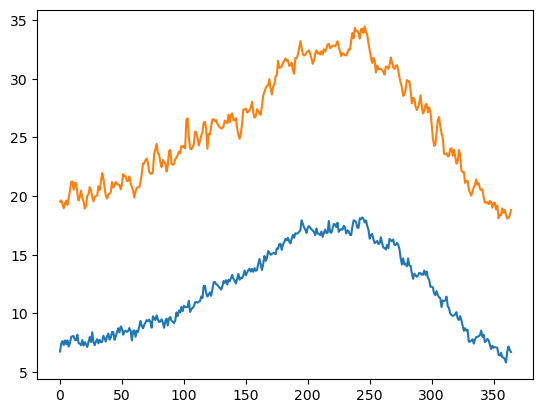

In [11]:
plt.plot(tmin_normal)
plt.plot(tmax_normal)

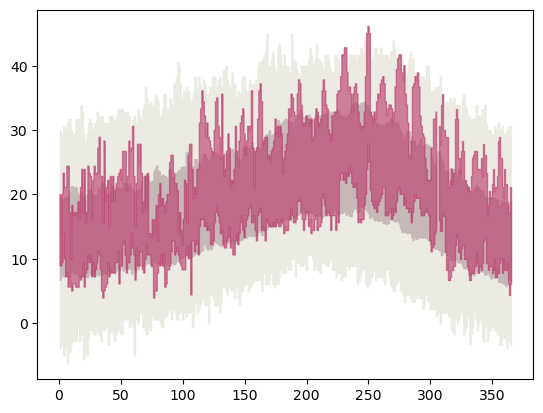

In [12]:
station, year = 'PASADENA', 2020
thisyear = getweather.getyear(station, ['TMIN', 'TMAX'], year)

days = np.arange(1, 366)
plt.fill_between(days, tmin_record, tmax_record, color=(0.92,0.92,0.89), step='mid') # step='mid' makes blocky regions 
plt.fill_between(days, tmin_normal, tmax_normal, color=(0.78,0.72,0.72), step='mid')
plt.fill_between(days, thisyear['TMIN'], thisyear['TMAX'], color=(0.73,0.21,0.41), alpha=0.6, step='mid'); # alpha sets transparency

In [13]:
avg = 0.5 * (np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX']))
avg

np.float64(20.268080310100856)

In [14]:
f'{station}, {year}: average temperature = {avg:.2f} °C'

'PASADENA, 2020: average temperature = 20.27 °C'

In [15]:
def nyplot(station, year):
    plt.figure(figsize=(12, 3.5))  # a better aspect ratio for the figure
     
    allyears = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                          for year in range(1910, 2020)])
    
    normal = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                        for year in range(1981, 2011)])

    thisyear = getweather.getyear(station, ['TMIN', 'TMAX'], year)
    
    tmin_record, tmax_record = np.nanmin(allyears['TMIN'], axis=0), np.nanmax(allyears['TMAX'], axis=0)
    tmin_normal, tmax_normal = np.nanmean(normal['TMIN'], axis=0), np.nanmean(normal['TMAX'], axis=0)

    days = np.arange(1, 366)
    plt.fill_between(days, tmin_record, tmax_record, color=(0.92,0.92,0.89), step='mid')
    plt.fill_between(days, tmin_normal, tmax_normal, color=(0.78,0.72,0.72), step='mid')
    plt.fill_between(days, thisyear['TMIN'], thisyear['TMAX'], color=(0.73,0.21,0.41), alpha=0.6, step='mid')

    plt.axis(xmin=1, xmax=365, ymin=-15, ymax=50)
    # create approximate monthly ticks for x axis
    plt.xticks(range(15, 365, 30), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    plt.ylabel('temperature, °C')
    
    avg = 0.5 * (np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX']))
    plt.title(f'{station}, {year}: average temperature = {avg:.2f} °C');               # later

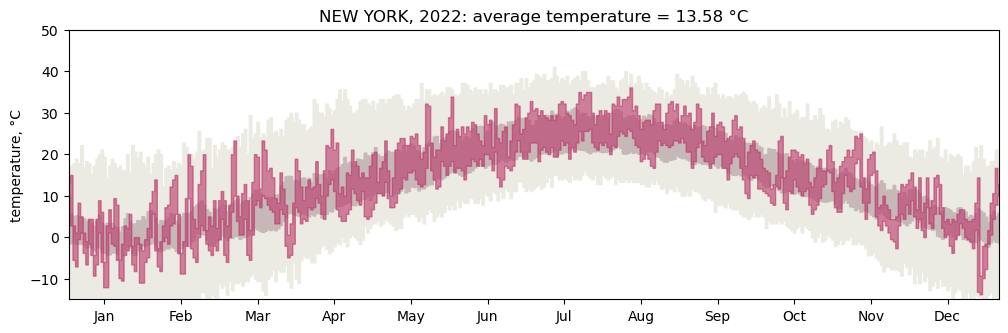

In [16]:
nyplot('NEW YORK', 2022)